In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data = data.drop(['id'], axis=1)

**Attribute Information**

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient*

In [4]:
print(data.shape)
print('\n'*1)
print('-'*50)
print('\n'*1)
data.info()

(5110, 11)


--------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
data_new = pd.get_dummies(data, columns=['work_type', 'smoking_status'])
data_new

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,Female,61.0,0,0,Yes,Rural,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Urban,83.75,NaN,0,0,0,1,0,0,0,0,1,0
5106,Female,81.0,0,0,Yes,Urban,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,Female,35.0,0,0,Yes,Rural,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,Male,51.0,0,0,Yes,Rural,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [6]:
data_new = data_new.drop(['gender', 'ever_married', 'Residence_type'], axis=1)
data_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = data[['gender', 'ever_married', 'Residence_type']]

for i in dfle:
    dfle[i] = le.fit_transform(dfle[i])

dfle

,gender,ever_married,Residence_type
0,1,1,1
1,0,1,0
2,1,1,0
3,0,1,1
4,0,1,0
...,...,...,...
5105,0,1,1
5106,0,1,1
5107,0,1,0
5108,1,1,0


In [9]:
dataset = data_new.join(dfle)
data = dataset
data.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [13]:
data_ = data.drop(['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status'], axis=1)
data = data_.join(dfle)
data.isna().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
gender                 0
ever_married           0
Residence_type         0
dtype: int64

# Correlation

In [47]:
corr = data.corr()

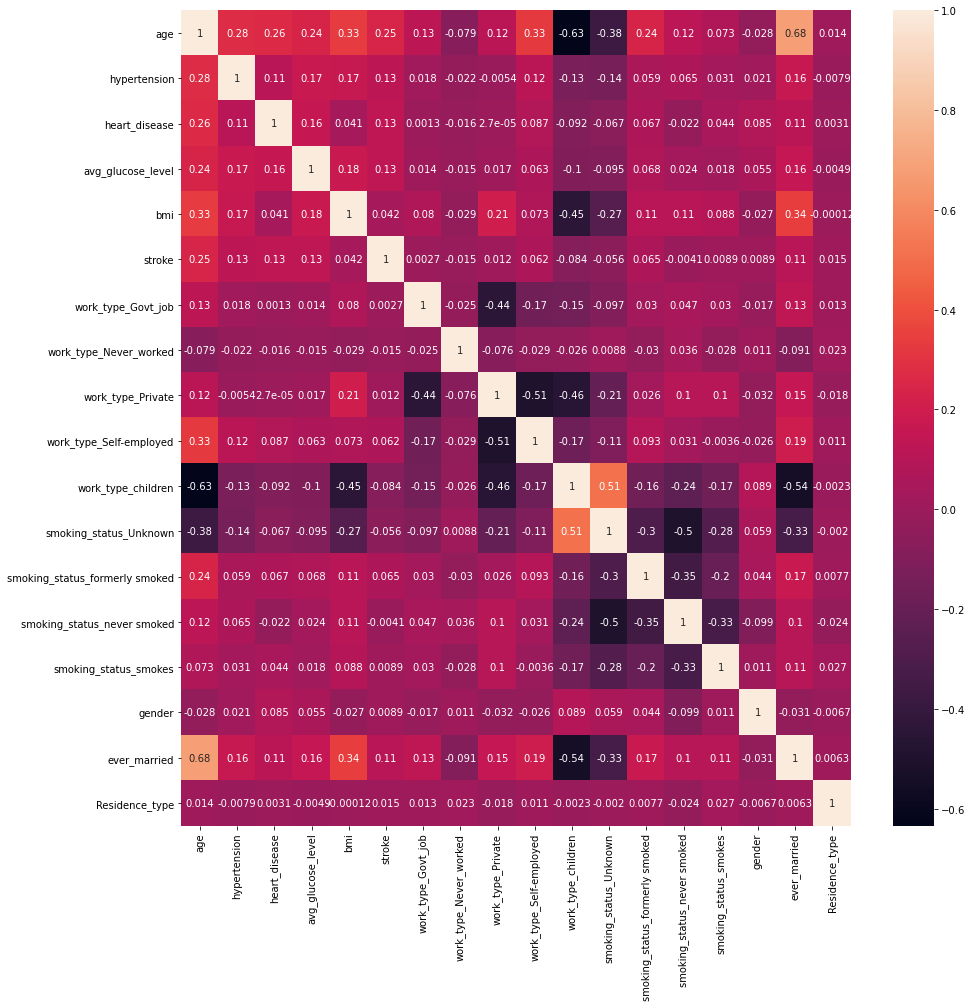

In [48]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=True, )

# Outliers

<AxesSubplot:>

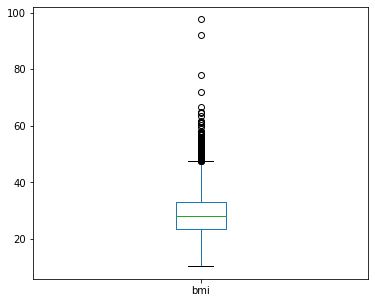

In [49]:
data['bmi'].plot(x='bmi' , kind='box', figsize=(6, 5))

**Treating the outliers of bmi**

In [50]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['bmi'] < (Q1 - 1.5 * IQR)) | (data['bmi'] > (Q3 + 1.5 * IQR)))] 
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married,Residence_type
0,67.0,0,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0,1,1,1
1,61.0,0,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0,1,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1,0,1,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,0,0,0,1,0,0,1,1
5106,81.0,0,0,125.20,40.0,0,0,0,0,1,0,0,0,1,0,0,1,1
5107,35.0,0,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0,1,1,0


**bmi without the outliers**

<AxesSubplot:>

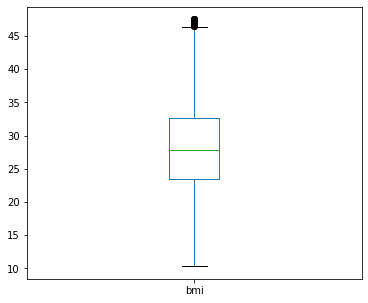

In [51]:
data['bmi'].plot(x='bmi' , kind='box', figsize=(6, 5))

<AxesSubplot:>

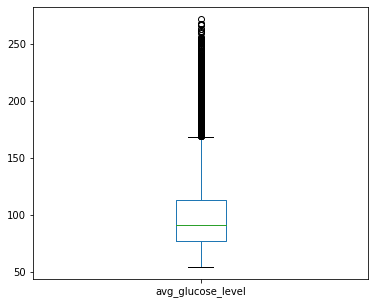

In [52]:
data['avg_glucose_level'].plot(x='avg_glucose_level' , kind='box', figsize=(6, 5))


**Treating the outliers of Glucose Level**

In [53]:
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (data['avg_glucose_level'] > (Q3 + 1.5 * IQR)))] 
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married,Residence_type
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0,1,1,0
6,74.0,1,1,70.09,27.4,1,0,0,1,0,0,0,0,1,0,1,1,0
7,69.0,0,0,94.39,22.8,1,0,0,1,0,0,0,0,1,0,0,0,1
8,59.0,0,0,76.15,NaN,1,0,0,1,0,0,1,0,0,0,0,1,0
9,78.0,0,0,58.57,24.2,1,0,0,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,0,0,0,1,0,0,1,1
5106,81.0,0,0,125.20,40.0,0,0,0,0,1,0,0,0,1,0,0,1,1
5107,35.0,0,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0,1,1,0


**Glucose Level without the outliers**

<AxesSubplot:>

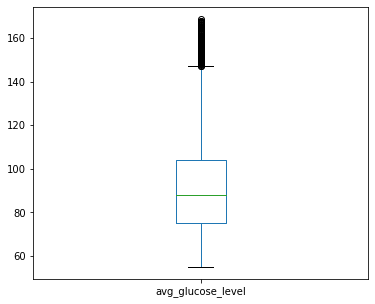

In [54]:
data['avg_glucose_level'].plot(x='avg_glucose_level' , kind='box', figsize=(6, 5))

# Missing Values

In [55]:
missing_value = data.isnull().sum()
missing_value

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               140
stroke                              0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
gender                              0
ever_married                        0
Residence_type                      0
dtype: int64

Ada banyak missing values di column bmi. We are going to check median of the dataset first.

In [56]:
print(data.bmi.median())
print('\n' * 1)
print('-'*50)
print(data.bmi.mean())

27.4


--------------------------------------------------
27.811992490025883


In [57]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married,Residence_type
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0,1,1,0
6,74.0,1,1,70.09,27.4,1,0,0,1,0,0,0,0,1,0,1,1,0
7,69.0,0,0,94.39,22.8,1,0,0,1,0,0,0,0,1,0,0,0,1
8,59.0,0,0,76.15,NaN,1,0,0,1,0,0,1,0,0,0,0,1,0
9,78.0,0,0,58.57,24.2,1,0,0,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,0,0,0,1,0,0,1,1
5106,81.0,0,0,125.20,40.0,0,0,0,0,1,0,0,0,1,0,0,1,1
5107,35.0,0,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0,1,1,0


In [58]:
#Fill the NaN datapoint of bmi with means

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

#Check Missing Value
data.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
gender                            0
ever_married                      0
Residence_type                    0
dtype: int64

# Visualization

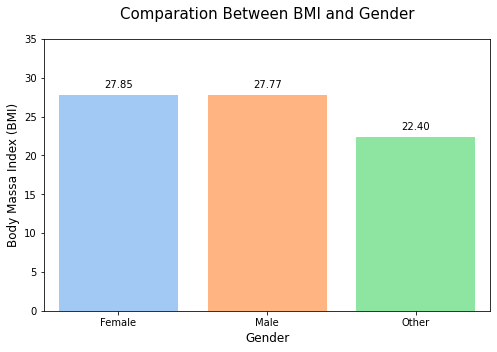

In [59]:
plt.figure(figsize=(8,5))
gbplot = sns.barplot(x='gender', y ='bmi', data=data, saturation = 1.0, ci = None, palette='pastel')
for p in gbplot.patches:
    gbplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#Keterangan :
#'.2f' = jumlah desimal

plt.title('Comparation Between BMI and Gender', fontsize=15, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Body Massa Index (BMI)', fontsize=12)
plt.ylim(0, 35) #cara biar nambahin number di y nya
locs, labels = plt.xticks()
plt.xticks([0,1,2], ['Female', 'Male', 'Other'])
plt.show()



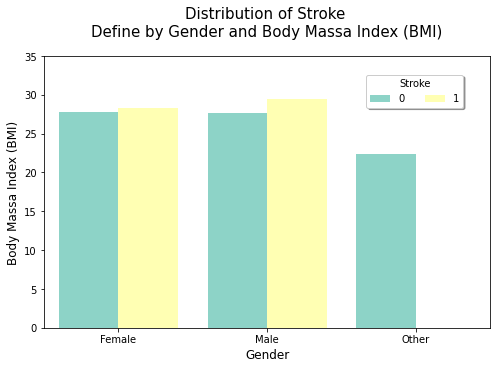

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='bmi', data=data, saturation=1, ci=None, hue='stroke', palette='Set3')
plt.title('Distribution of Stroke \nDefine by Gender and Body Massa Index (BMI)', fontsize=15, pad=20)
plt.legend(bbox_to_anchor=(0.95, 0.95), shadow=True, title='Stroke', ncol=2)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Body Massa Index (BMI)', fontsize=12)
plt.ylim(0, 35) 
plt.xticks([0,1,2], ['Female', 'Male', 'Other'])
plt.show()

In [61]:
df_crosstab = pd.crosstab(data['gender'], data['Residence_type'])
df_crosstab

Residence_type,0,1
gender,,
0,1275,1324
1,891,910
2,1,0


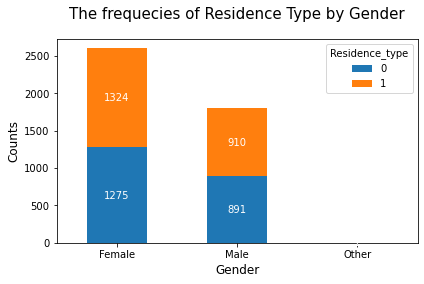

In [62]:
df_crosstab.plot.bar(stacked=True, linewidth=0.0)


ax = plt.subplot()
for rect in ax.patches:
    if rect.get_height() > 0:
        xval = rect.get_x() + rect.get_width() / 2
        yval = rect.get_y() + rect.get_height() / 2
        value = f"{rect.get_height():.0f}"
        ax.text(xval, yval, value, color="w", 
                     ha="center", va="center")
plt.title('The frequecies of Residence Type by Gender', fontsize=15, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.tight_layout()
plt.xticks([0,1,2], ['Female', 'Male', 'Other'], rotation=0)
plt.show()


In [65]:
data_smoke = pd.DataFrame(data['smoking_status'].value_counts()/len(data))

# Create a column "smoking"
data_smoke['smoking'] = data_smoke.index
data_smoke

KeyError: 'smoking_status'

NameError: name 'data_smoke' is not defined

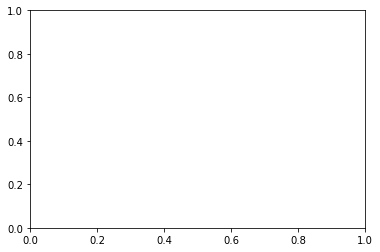

In [66]:
explode = (0, 0.1, 0, 0)  # Set the position of the slice

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(data_smoke['smoking_status'],
       labels=data_smoke['smoking'],
       autopct="%1.1f%%",
       startangle=90,
       counterclock=False,
       explode=explode,  # Set explode to reposition the slices
       textprops={'size': 'x-large'},
      )


plt.title('SMOKING STATUS', fontsize=15, pad=10) # Insert plot title
plt.tight_layout()
plt.show()

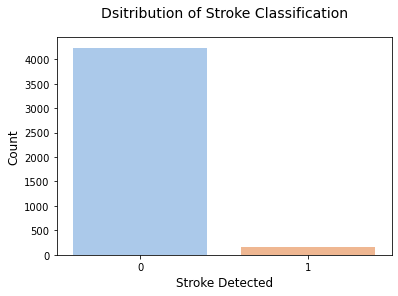

In [67]:
sns.countplot(data['stroke'], palette='pastel')
plt.title('Dsitribution of Stroke Classification', fontsize=14, pad=20)
plt.xlabel('Stroke Detected', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [68]:
print('stroke', data['stroke'].value_counts())

stroke 0    4236
1     165
Name: stroke, dtype: int64


In [69]:
df = data.sample(frac=1)

# amount of fraud classes 165 rows

stroke_df = data.loc[data['stroke'] == 1]
not_stroke_df = data.loc[data['stroke'] == 0][:165]

normal_distributed_df = pd.concat([stroke_df, not_stroke_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married,Residence_type
18,60.0,0,0,89.22,37.8,1,0,0,1,0,0,0,0,1,0,0,0,1
248,78.0,0,0,78.81,19.6,1,0,0,1,0,0,1,0,0,0,0,1,0
208,78.0,1,0,134.80,33.6,1,0,0,0,1,0,1,0,0,0,1,1,0
79,43.0,0,0,143.43,45.9,1,0,0,0,1,0,1,0,0,0,1,1,1
147,78.0,0,0,67.29,24.6,1,0,0,1,0,0,0,0,1,0,0,1,1


**After Down Resampling**

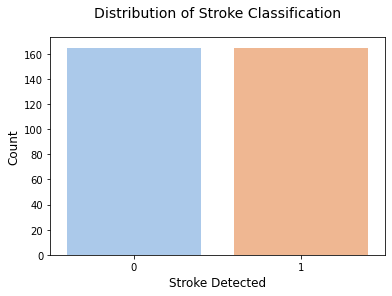

In [70]:
sns.countplot(new_df['stroke'], palette='pastel')
plt.title('Distribution of Stroke Classification', fontsize=14, pad=20)
plt.xlabel('Stroke Detected', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Modelling with Logistic Regression

In [71]:
X = data.drop(['stroke'], axis=1)
y = data['stroke']
print(X.shape)
print(y.shape)

(4401, 17)
(4401,)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Oversampling using SMOTE

In [73]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_smote)
print('After :', counter)

Before : Counter({0: 3385, 1: 135})
After : Counter({0: 3385, 1: 3385})


In [74]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train_smote, y_train_smote)
y_pred = logr.predict(X_test)

In [75]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [76]:
#Model Evaluation Performance

from sklearn.metrics import confusion_matrix, classification_report

#Evaluation model
print('Training accuracy :', logr.score(X_train, y_train))
print('-'*100)
print('Test accuracy ', logr.score(X_test, y_test))
print('-'*100)


#confution matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('-'*100)

#classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training accuracy : 0.9326704545454545
----------------------------------------------------------------------------------------------------
Test accuracy  0.9205448354143019
----------------------------------------------------------------------------------------------------
[[805  46]
 [ 24   6]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       851
           1       0.12      0.20      0.15        30

    accuracy                           0.92       881
   macro avg       0.54      0.57      0.55       881
weighted avg       0.94      0.92      0.93       881



In [107]:
#K-FOLD

X = data.drop(['stroke'], axis=1)
y = data['stroke']
print(X.shape)
print(y.shape)

(4401, 17)
(4401,)


In [108]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_resample(X, y)

counter = Counter(y_train_smote)
print('After :', counter)

Before : Counter({0: 4236, 1: 165})
After : Counter({1: 4236, 0: 4236})


In [109]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train_smote, y_train_smote)
y_pred = logr.predict(X)
score = cross_val_score(knn, X_std_smote2, y_std_smote2, cv=5, scoring='accuracy')

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4236
           1       0.13      0.18      0.15       165

    accuracy                           0.92      4401
   macro avg       0.55      0.56      0.55      4401
weighted avg       0.94      0.92      0.93      4401



# Modelling using SVM

In [78]:
X = data.drop('stroke', axis=1).values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [79]:
X_std = X_std
y_std = data['stroke']
print(X.shape)
print(y.shape)

(4401, 17)
(4401,)


In [80]:
from sklearn.model_selection import train_test_split

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_std, y_std, test_size=0.2, random_state=0)

In [81]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_train_smote2, y_train_smote2 = smt.fit_resample(X_train_n, y_train_n)

counter = Counter(y_train_smote2)
print('After :', counter)

Before : Counter({0: 3385, 1: 135})
After : Counter({0: 3385, 1: 3385})


In [82]:
from sklearn.svm import SVC
model_n = SVC()
model_n = model_n.fit(X_train_smote2, y_train_smote2)
y_pred_n = model_n.predict(X_test_n)
print(y_pred_n.shape)

(881,)


In [83]:
#Model Evaluation Performance

from sklearn.metrics import confusion_matrix, classification_report

#Evaluation model
print('Training accuracy :', model_n.score(X_train_smote2, y_train_smote2))
print('-'*100)
print('Test accuracy ', model_n.score(X_test_n, y_test_n))
print('-'*100)


#confution matrix
cm = confusion_matrix(y_test_n, y_pred_n)
print(cm)
print('-'*100)

#classification report
cr = classification_report(y_test_n, y_pred_n)
print(cr)

Training accuracy : 0.9149187592319055
----------------------------------------------------------------------------------------------------
Test accuracy  0.8331441543700341
----------------------------------------------------------------------------------------------------
[[720 131]
 [ 16  14]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       851
           1       0.10      0.47      0.16        30

    accuracy                           0.83       881
   macro avg       0.54      0.66      0.53       881
weighted avg       0.95      0.83      0.88       881



In [101]:
#K-Fold

X = data.drop('stroke', axis=1).values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)


X_std = X_std
y_std = data['stroke']
print(X.shape)
print(y.shape)


(4401, 17)
(4401,)


In [103]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_std)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_std_smote2, y_std_smote2 = smt.fit_resample(X_std, y_std)

counter = Counter(y_std_smote2)
print('After :', counter)

Before : Counter({0: 4236, 1: 165})
After : Counter({1: 4236, 0: 4236})


In [105]:
from sklearn.svm import SVC
model = SVC()
model = model.fit(X_std_smote2, y_std_smote2)
y_pred = model.predict(X_std)
print(y_pred.shape)
score = cross_val_score(knn, X_std_smote2, y_std_smote2, cv=5, scoring='accuracy')

(4401,)


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_std, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      4236
           1       0.18      0.90      0.31       165

    accuracy                           0.85      4401
   macro avg       0.59      0.87      0.61      4401
weighted avg       0.97      0.85      0.89      4401



# KNN

In [84]:
X_k = data.drop(['stroke'], axis=1)
y_k = data['stroke']

In [85]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_k_clean = minmax.fit_transform(X_k)

# SMOTE

In [86]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_k)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_k, y_k)

counter = Counter(y_smote)
print('After :', counter)

Before : Counter({0: 4236, 1: 165})
After : Counter({1: 4236, 0: 4236})


In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
list_neighbors = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for n_neighbors in list_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    score = cross_val_score(knn, X_smote, y_smote, cv=5, scoring='accuracy')
    mean_score = np.mean(score)
    print(n_neighbors, mean_score)


3 0.9079302622826356
4 0.9114711301034711
5 0.8969529799779197
6 0.9014387757589688
7 0.8898715229527779
8 0.8941207036460455
9 0.8823173233309998
10 0.8855037212720237
11 0.8764149018050869
12 0.88019168817238


# MODEL EVALUATION

In [99]:

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_k, y_k)
y_pred_k = knn.predict(X_k)


from sklearn.metrics import classification_report
print(classification_report(y, y_pred_k))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4236
           1       0.69      0.05      0.10       165

    accuracy                           0.96      4401
   macro avg       0.83      0.53      0.54      4401
weighted avg       0.95      0.96      0.95      4401



**Precision :**

FP rendah = data negatif namun diprediksi sebagai data positif. Contohnya, pasien tidak menderita stroke (class 2) tetapi dari model yang telah memprediksi pasien tersebut menderita stroke (class 1)

**Recall : FN rendah**

False Negative (FN)
Merupakan data positif namun diprediksi sebagai data negatif. Contohnya, pasien menderita stroke (class 1) tetapi dari model yang dibuat memprediksi pasien tersebut tidak menderita storke (class 2).

In [111]:
X_k = data.drop(['stroke'], axis=1)
y_k = data['stroke']

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_k_clean = minmax.fit_transform(X_k)

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_k, y_k, test_size=0.2, random_state=0)

In [113]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_k)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print('After :', counter)

Before : Counter({0: 4236, 1: 165})
After : Counter({0: 3385, 1: 3385})


In [114]:
from sklearn.neighbors import KNeighborsClassifier
list_neighbors = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for n_neighbors in list_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    mean_score = np.mean(score)
    print(n_neighbors, mean_score)

3 0.9385032720028699
4 0.9385032720028699
5 0.9385032720028699
6 0.9385032720028699
7 0.9385032720028699
8 0.9385032720028699
9 0.9385032720028699
10 0.9385032720028699
11 0.9385032720028699
12 0.9385032720028699


In [115]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_k, y_k)
y_pred_k = knn.predict(X_k)


from sklearn.metrics import classification_report
print(classification_report(y, y_pred_k))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4236
           1       0.69      0.05      0.10       165

    accuracy                           0.96      4401
   macro avg       0.83      0.53      0.54      4401
weighted avg       0.95      0.96      0.95      4401



# ANN

In [94]:
X = data.drop(['stroke'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_ann = scaler.fit_transform(X)

y = data['stroke']
print(X_ann.shape)
print(y.shape)

(4401, 17)
(4401,)


In [95]:
from sklearn.model_selection import train_test_split

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y, test_size=0.2, random_state=0)

In [96]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train_ann)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_train_smote5, y_train_smote5 = smt.fit_resample(X_train_ann, y_train_ann)

counter = Counter(y_train_smote5)
print('After :', counter)

Before : Counter({0: 3385, 1: 135})
After : Counter({0: 3385, 1: 3385})


In [97]:
from sklearn.neural_network import MLPClassifier

# create the classifier
clf = MLPClassifier(random_state=42)

# Train the model using the training sets
clf.fit(X_train_smote5, y_train_smote5)

#Prediction
y_pred = clf.predict(X_test_ann)
print(y_pred.shape)

from sklearn.model_selection import cross_val_score

score = cross_val_score(clf, X_train_smote5, y_train_smote5, scoring='accuracy', cv=5)
score = np.mean(score)
print('acc k-fold:', score)

(881,)
acc k-fold: 0.9487444608567209


In [98]:
#Model Evaluation Performance

from sklearn.metrics import confusion_matrix, classification_report

#Evaluation model
print('Training accuracy :', clf.score(X_train_smote5, y_train_smote5))
print('-'*100)
print('Test accuracy ', clf.score(X_test_ann, y_test_ann))
print('-'*100)


#confution matrix
cm = confusion_matrix(y_test_ann, y_pred)
print(cm)
print('-'*100)

#classification report
cr = classification_report(y_test_ann, y_pred)
print(cr)

Training accuracy : 0.9729689807976366
----------------------------------------------------------------------------------------------------
Test accuracy  0.9001135073779796
----------------------------------------------------------------------------------------------------
[[790  61]
 [ 27   3]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       851
           1       0.05      0.10      0.06        30

    accuracy                           0.90       881
   macro avg       0.51      0.51      0.51       881
weighted avg       0.94      0.90      0.92       881

